<a href="https://colab.research.google.com/github/fahmicode10/Portfolio-Project-Data-Science_Fahmi-Azraa/blob/main/Project_Portfolio_Data_Science_Fahmi_Azraa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Portfolio : Movie Analysis**

A. Understanding Data

B. Data Preparation

C. Feature Engineering

D. Exploratory Data Analysis

E. Machine Learning Workflow

F. Supervised Machine Learning

G. Model Evaluation

H. Tuning

# **A. Understanding Data**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir('/content/gdrive/MyDrive/Modul Praktek')

In [4]:
os.listdir()

['Mission: Movie Analytics for Data Scientist.pptx',
 'movies_metadata.csv',
 'ratings_small.csv',
 'Movie Analytics.ipynb']

In [5]:
movies_data = pd.read_csv("movies_metadata.csv")

In [6]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [7]:
movies_data.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,True,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,True,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,True,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


# **B. Data Preparation**

**Filter Data**

In [8]:
movies_data["release_date"] = pd.to_datetime(movies_data["release_date"])

In [9]:
movies_data["release_date"].dtypes

dtype('<M8[ns]')

In [10]:
movies_data["status"].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [11]:
movies_data["original_language"].nunique()

89

**Sorting Data**

In [12]:
english_release = movies_data[(movies_data["status"] == "Released") &\
                              (movies_data["original_language"] == "en")]

In [13]:
english_release.sort_values(["budget", "revenue"], ascending = [False, False]).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
17124,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,...,2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0
11827,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0
26557,True,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,6908.0
11067,True,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,...,2006-06-28,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0
44839,True,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",...,2017-06-21,6.049421e+08,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0
16130,True,"{'id': 463959, 'name': 'Tangled Collection', '...",260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757,tt0398286,en,Tangled,When the kingdom's most wanted-and most charmi...,...,2010-11-24,5.917949e+08,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're taking adventure to new lengths.,Tangled,False,7.4,3419.0
18685,True,NaN,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,tt0401729,en,John Carter,"John Carter is a war-weary, former military ca...",...,2012-03-07,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,False,6.1,2170.0
11780,True,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man3/,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,2007-05-01,8.908716e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,5.9,3687.0
21174,True,NaN,255000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://disney.go.com/the-lone-ranger/,57201,tt1210819,en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,...,2013-07-03,8.928991e+07,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Never Take Off the Mask,The Lone Ranger,False,5.9,2361.0
43252,True,"{'id': 9485, 'name': 'The Fast and the Furious...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.fas

**Duplicate Data**

In [14]:
english_release[english_release.duplicated(subset= "original_title", keep = False)]. sort_values("original_title")

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
15200,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,12219,tt0118528,en,12 Angry Men,During the trial of a man accused of his fathe...,...,1997-08-17,0.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,12 Angry Men,False,7.5,59.0
1161,True,NaN,350000,"[{'id': 18, 'name': 'Drama'}]",NaN,389,tt0050083,en,12 Angry Men,The defense and the prosecution have rested an...,...,1957-03-25,1000000.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life is in their hands. Death is on their minds.,12 Angry Men,False,8.2,2130.0
20847,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2966,tt0118248,en,"20,000 Leagues Under the Sea","The year is 1886, when New England's fishing h...",...,1997-05-11,0.0,158.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the last place on earth.,"20,000 Leagues Under the Sea",False,4.6,13.0
13003,True,NaN,200000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,30266,tt0006333,en,"20,000 Leagues Under the Sea",Captain Nemo has built a fantastic submarine f...,...,1916-12-24,8000000.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The First Submarine Photoplay Ever Filmed,"20,000 Leagues Under the Sea",False,6.0,7.0
24108,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,2965,tt0118247,en,"20,000 Leagues Under the Sea","In the 19th century, an expert marine biologis...",...,1997-03-23,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Darkness is to be feared... above and below.,"20,000 Leagues Under the Sea",False,6.3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,True,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,1949,tt0443706,en,Zodiac,The true story of the investigation of 'The Zo...,...,2007-03-02,84785914.0,157.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's more than one way to lose your life to...,Zodiac,False,7.3,2080.0
37896,True,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,351065,tt3763866,en,Zoom,A multi-dimensional interface between a comic ...,...,2015-09-11,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Zoom,False,5.7,25.0
11171,True,NaN,35000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",NaN,14113,tt0383060,en,Zoom,Jack Shepard is an out-of-shape auto shop owne...,...,2006-08-11,12506188.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're going to save the world... as long as ...,Zoom,False,4.9,140.0
5761,True,"{'id': 374386, 'name': 'Anglo-Zulu War Collect...",3500000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,14433,tt0058777,en,Zulu,"In 1879, during the Zulu wars, man of the peop...",...,1964-01-22,8000000.0,138.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Dwarfing the mightiest! Towering over the grea...,Zulu,False,7.4,137.0


In [15]:
english_release.drop_duplicates(inplace = True)

<ipython-input-15-b9fffde2a416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.drop_duplicates(inplace = True)


**Missing Value**

In [16]:
english_release.isna().sum()

adult                        0
belongs_to_collection    28845
budget                       0
genres                       0
homepage                 25842
id                           0
imdb_id                     11
original_language            0
original_title               0
overview                    64
popularity                   0
poster_path                311
production_companies         0
production_countries         0
release_date                59
revenue                      0
runtime                      6
spoken_languages             0
status                       0
tagline                  14114
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [17]:
english_release["belongs_to_collection"] = english_release["belongs_to_collection"].fillna("No Data")
english_release["homepage"] = english_release["homepage"].fillna("No Data")
english_release["poster_path"] = english_release["poster_path"].fillna("No Data")
english_release["tagline"] = english_release["tagline"].fillna("No tagline")

<ipython-input-17-2f7ddcfa90f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["belongs_to_collection"] = english_release["belongs_to_collection"].fillna("No Data")
<ipython-input-17-2f7ddcfa90f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["homepage"] = english_release["homepage"].fillna("No Data")
<ipython-input-17-2f7ddcfa90f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [18]:
english_release.dropna(inplace = True)

<ipython-input-18-69077d33911e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.dropna(inplace = True)


In [19]:
english_release.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

**Kasus 1**

menampilkan 10 Film yang telah dirilis serta diurutkan berdasarkan vote tertinggi.

In [20]:
english_release.sort_values("vote_count", ascending = False).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
15480,True,No Data,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",...,2010-07-14,8.255328e+08,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075.0
12481,True,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,2008-07-16,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0
14551,True,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
17818,True,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,2012-04-25,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000.0
26563,True,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,...,2016-02-09,7.831130e+08,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,False,7.4,11444.0
22878,True,No Data,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.interstellarmovie.net/,157336,tt0816692,en,Interstellar,Interstellar chronicles the adventures of a gr...,...,2014-11-05,6.751200e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,False,8.1,11187.0
20050,True,No Data,100000000,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",http://unchainedmovie.com/,68718,tt1853728,en,Django Unchained,"With the help of a German bounty hunter, a fre...",...,2012-12-25,4.253682e+08,165.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,False,7.8,10297.0
23752,True,"{'id': 284433, 'name': 'Guardians of the Galax...",170000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://marvel.com/guardians,118340,tt2015381,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",...,2014-07-30,7.733286e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All heroes start somewhere.,Guardians of the Galaxy,False,7.9,10014.0
2843,True,No Data,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,1999-10-15,1.008538e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,Fight Club,False,8.3,9678.0
18244,True,"{'id': 131635, 'name': 'The Hunger Games Colle...",75000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.thehungergames.movie/,70160,tt1392170,en,The Hunger Games,Every year in the ruins of what was once North...,...,2012-03-12,6.912107e+08,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,May The Odds Be Ever In Your Favor.,The Hunger Games,False,6.9,9634.0


**Kasus 2**

Menampilkan film - film yang berdurasi lebih dari 3 jam.

In [21]:
english_release[english_release["runtime"] > 60 * 3 ]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13,True,No Data,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",No Data,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0
378,True,No Data,63000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",No Data,12160,tt0111756,en,Wyatt Earp,Covering the life and times of one of the West...,...,1994-06-24,25052000.0,191.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The epic story of love and adventure in a lawl...,Wyatt Earp,False,6.5,203.0
522,True,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,1993-11-29,321365567.0,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
530,True,No Data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,695,tt0108122,en,Short Cuts,"Multi-storied, fish-eyed look at American cult...",...,1993-09-05,6110979.0,187.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Short Cuts raises the roof on America.,Short Cuts,False,6.9,136.0
583,True,No Data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,1990-11-09,424208848.0,181.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44755,True,No Data,0,[],No Data,128733,tt0080230,en,Hollywood,The definitive documentary about the American ...,...,1980-02-09,0.0,780.0,[],Released,No tagline,Hollywood,False,8.0,1.0
44760,True,No Data,0,"[{'id': 99, 'name': 'Documentary'}]",No Data,461805,tt6840134,en,The Putin Interviews,"Academy Award-winning filmmaker, Oliver Stone ...",...,2017-06-12,0.0,240.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Know Your Enemy,The Putin Interviews,False,8.1,8.0
44924,True,No Data,0,"[{'id': 10752, 'name': 'War'}, {'id': 99, 'nam...",https://www.netflix.com/title/80049928,449758,tt6587094,en,Five Came Back,The extraordinary story of how Hollywood chang...,...,2017-03-31,0.0,195.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They Showed The War To The World,Five Came Back,False,8.3,8.0
44959,True,No Data,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",No Data,32228,tt0386907,en,5ive Days to Midnight,A physicist discovers a briefcase containing p...,...,2004-01-01,0.0,210.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No tagline,5ive Days to Midnight,False,6.8,18.0


# **Feature Engineering**

**Aggregate**

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [24]:
os.chdir('/content/gdrive/MyDrive/Modul Praktek')

In [25]:
os.listdir()

['Mission: Movie Analytics for Data Scientist.pptx',
 'movies_metadata.csv',
 'ratings_small.csv',
 'Movie Analytics.ipynb']

In [26]:
rating = pd.read_csv("ratings_small.csv")

In [27]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [28]:
rating["timestamp"] = pd.to_datetime(rating["timestamp"], unit = "s")

In [29]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100004 non-null  int64         
 1   movieId    100004 non-null  int64         
 2   rating     100004 non-null  float64       
 3   timestamp  100004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [30]:
rating.duplicated().sum()

0

In [31]:
rating.groupby("movieId")["rating"].agg(["mean", "count", "median"])

,mean,count,median
movieId,,,
1,3.872470,247,4.0
2,3.401869,107,3.0
3,3.161017,59,3.0
4,2.384615,13,3.0
5,3.267857,56,3.0
...,...,...,...
161944,5.000000,1,5.0
162376,4.500000,1,4.5
162542,5.000000,1,5.0


In [32]:
rating.groupby("movieId").agg({"userId": pd.Series.nunique,
                               "rating": ["mean", "median"]})

userId    rating       
        nunique      mean median
movieId                         
1           247  3.872470    4.0
2           107  3.401869    3.0
3            59  3.161017    3.0
4            13  2.384615    3.0
5            56  3.267857    3.0
...         ...       ...    ...
161944        1  5.000000    5.0
162376        1  4.500000    4.5
162542        1  5.000000    5.0
162672        1  3.000000    3.0
163949        1  5.000000    5.0

[9066 rows x 3 columns]

In [33]:
movies_rating = rating.groupby("movieId")["rating"].agg(["mean", "count", "median"])

In [34]:
movies_rating

,mean,count,median
movieId,,,
1,3.872470,247,4.0
2,3.401869,107,3.0
3,3.161017,59,3.0
4,2.384615,13,3.0
5,3.267857,56,3.0
...,...,...,...
161944,5.000000,1,5.0
162376,4.500000,1,4.5
162542,5.000000,1,5.0


**Join**

In [35]:
english_release_rating = english_release.merge(movies_rating,
                                               left_on = "id",
                                               right_on = "movieId",
                                               how = "inner")

In [36]:
english_release_rating

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,mean,count,median
0,True,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.75
1,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,1.50
2,True,No Data,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,4.00
3,True,No Data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.50
4,True,No Data,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,True,No Data,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",No Data,2286,tt0381111,en,Kruistocht in Spijkerbroek,Dolf a 15 year old boy is sent back in time by...,...,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,No tagline,Crusade in Jeans,False,6.0,15.0,1.666667,3,1.00
2047,True,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,3178,tt0211941,en,Beat,The story of writer William Seward Burroughs a...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sex and Drugs before Rock and Roll,Beat,False,4.9,9.0,3.636364,22,4.00
2048,True,"{'id': 2704, 'name': 'The Bible Collection', '...",20000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",No Data,2331,tt0199232,en,Jesus,The film is notable for presenting a more huma...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No tagline,Jesus,False,5.4,8.0,3.777778,9,4.00
2049,True,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,80831,tt1576459,en,Sang Pemimpi,This movie is an adaptation from a popular nov...,...,"[{'iso_639_1': 'id', 'name': 'Bahasa indonesia'}]",Released,No tagline,Sang Pemimpi,False,6.5,2.0,3.250000,4,3.25


## **Feuture Engineering**

**1. Membuat kolom profit = revenue budget**

In [37]:
english_release_rating["profit"] = english_release_rating["revenue"].sub(english_release_rating["budget"])

In [38]:
english_release_rating[["original_title", "profit", "runtime"]].sort_values("profit", ascending = False)

,original_title,profit,runtime
310,Titanic,1.645034e+09,194.0
976,The Lord of the Rings: The Return of the King,1.024889e+09,201.0
1309,Pirates of the Caribbean: Dead Man's Chest,8.656598e+08,151.0
82,Jurassic Park,8.571000e+08,127.0
759,Harry Potter and the Philosopher's Stone,8.514756e+08,152.0
...,...,...,...
1797,Foodfight!,-6.492629e+07,87.0
473,Inspector Gadget,-7.500000e+07,78.0
1703,Arthur et la vengeance de Maltazard,-8.700000e+07,93.0
2,Cutthroat Island,-8.798268e+07,119.0


**2. Membuat kolom bahasa**

In [39]:
english_release_rating["original_language"] == "en"

0       True
1       True
2       True
3       True
4       True
        ... 
2046    True
2047    True
2048    True
2049    True
2050    True
Name: original_language, Length: 2051, dtype: bool

**3. Membuat kolom panjang durasi film**

In [40]:
english_release_rating["long_duration_movie"] = (english_release_rating["runtime"] >= 60 * 3).astype("int")

In [41]:
english_release_rating[english_release_rating["long_duration_movie"] == 1]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,mean,count,median,profit,long_duration_movie
92,True,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,3.000000,3,3.50,2.993656e+08,1
94,True,No Data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,695,tt0108122,en,Short Cuts,"Multi-storied, fish-eyed look at American cult...",...,Short Cuts raises the roof on America.,Short Cuts,False,6.9,136.0,4.000000,2,4.00,6.110979e+06,1
102,True,No Data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0,4.235294,17,4.00,4.022088e+08,1
196,True,No Data,15000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,947,tt0056172,en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,...,No tagline,Lawrence of Arabia,False,7.8,870.0,3.681818,11,4.00,5.499538e+07,1
206,True,"{'id': 230, 'name': 'The Godfather Collection'...",13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,240,tt0071562,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,...,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,False,8.3,3418.0,3.400000,5,3.00,3.454284e+07,1
238,True,No Data,15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,665,tt0052618,en,Ben-Hur,Ben-Hur is a 1959 epic film directed by Willia...,...,The entertainment experience of a lifetime.,Ben-Hur,False,7.5,660.0,3.400000,5,3.00,1.319000e+08,1
240,True,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",No Data,783,tt0083987,en,Gandhi,"In the early years of the 20th century, Mohand...",...,His triumph changed the world forever.,Gandhi,False,7.4,730.0,3.357143,49,3.50,5.573789e+07,1
310,True,No Data,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,3.360544,147,3.00,1.645034e+09,1
360,True,No Data,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,907,tt0059113,en,Doctor Zhivago,Doctor Zhivago is the filmed adapation of the ...,...,Turbulent were the times and fiery was the lov...,Doctor Zhivago,False,7.4,252.0,4.090909,11,4.00,1.008584e+08,1
479,True,No Data,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,3175,tt0072684,en,Barry Lyndon,"In the Eighteenth Century, in a small village ...",...,At long last Redmond Barry became a gentleman ...,Barry Lyndon,False,7.7,521.0,3.507692,65,3.50,9.000000e+06,1


In [42]:
english_release_rating["original_title"].str.len()

0        4
1        9
2       16
3        6
4       21
        ..
2046    26
2047     4
2048     5
2049    12
2050    26
Name: original_title, Length: 2051, dtype: int64

**4. Membuat kolom panjang judul film**

In [43]:
english_release_rating["title_length"] = english_release_rating["original_title"].str.len()

In [44]:
english_release_rating[english_release_rating["title_length"] < 5 ]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,mean,count,median,profit,long_duration_movie,title_length
0,True,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Heat,False,7.7,1886.0,3.593750,16,3.75,127436818.0,0,4
43,True,No Data,31000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",No Data,1945,tt0110638,en,Nell,"In a remote woodland cabin, a small town docto...",...,Nell,False,6.1,128.0,4.448276,29,4.50,75683817.0,0,4
122,True,No Data,45000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,7095,tt0116669,en,Jack,Jack Powell suffers from an affliction that ma...,...,Jack,False,5.9,340.0,2.500000,1,2.50,13620973.0,0,4
126,True,No Data,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://www.miramax.com/movie/emma/,3573,tt0116191,en,Emma,Emma Woodhouse is a congenial young lady who d...,...,Emma,False,6.7,152.0,2.250000,2,2.25,16231658.0,0,4
301,True,"{'id': 103372, 'name': 'Mr. Bean Collection', ...",18000000,"[{'id': 35, 'name': 'Comedy'}]",No Data,1281,tt0118689,en,Bean,Bean works as a caretaker at Britain's formida...,...,Bean,False,6.3,602.0,4.043478,23,4.00,233212670.0,0,4
333,True,No Data,60000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",http://www.pithemovie.com/,473,tt0138704,en,Pi,The debut film from Darren Aronofsky in which ...,...,Pi,False,7.1,600.0,1.000000,3,1.00,3161152.0,0,2
355,True,No Data,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",No Data,841,tt0087182,en,Dune,"In the year 10,191, the world is at war for co...",...,Dune,False,6.5,576.0,3.714286,7,4.00,-9074310.0,0,4
363,True,"{'id': 63043, 'name': 'TRON Collection', 'post...",17000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",No Data,97,tt0084827,en,Tron,As Kevin Flynn searches for proof that he inve...,...,Tron,False,6.6,717.0,3.875000,8,4.00,16000000.0,0,4
373,True,No Data,1500000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",No Data,1580,tt0040746,en,Rope,"Two young men strangle their ""inferior"" classm...",...,Rope,False,7.8,539.0,3.663158,190,4.00,700000.0,0,4
382,True,No Data,13000000,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",No Data,3682,tt0120577,en,54,"Shane, a Jersey boy with big dreams, crosses t...",...,54,False,5.5,138.0,2.714286,7,3.00,3757163.0,0,2


**5. Membuat kolom runtime dari menit --> jam**

In [45]:
english_release_rating["duration_hours"] = english_release_rating["runtime"]/60

In [46]:
english_release_rating["duration_hours"].head()

0    2.833333
1    2.166667
2    1.983333
3    2.966667
4    2.266667
Name: duration_hours, dtype: float64

In [47]:
english_release_rating["year_release"] = english_release_rating["release_date"]

In [48]:
english_release_rating["year_release"].head()

0   1995-12-15
1   1995-11-16
2   1995-12-22
3   1995-11-22
4   1995-12-13
Name: year_release, dtype: datetime64[ns]

**6. Membuat kolom favorite movies with median rating >= 3**

In [49]:
english_release_rating["favorite_movies"] = english_release_rating["median"] >=3

In [50]:
english_release_rating["favorite_movies"].head()

0     True
1    False
2     True
3     True
4     True
Name: favorite_movies, dtype: bool

In [51]:
year_release = english_release_rating.groupby("year_release").size()

In [52]:
year_release.sort_values(ascending = False).head(10)

year_release
2002-01-01    6
2009-01-01    5
2001-01-01    5
2006-08-31    4
2007-03-23    4
2005-09-09    4
1992-01-01    4
2008-01-01    4
1997-01-01    3
1997-12-19    3
dtype: int64

## **D. Exploratory Data Analysis**

In [53]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  bool          
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  int64         
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  int64         
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

**1. Bagaimana distribus dari film - film yang memiliki rating >3 ?**

In [54]:
rating = pd.read_csv("ratings_small.csv")

In [55]:
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [56]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

In [57]:
rating_movies

,movieId,rating
0,1,4.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
9061,161944,5.0
9062,162376,4.5
9063,162542,5.0
9064,162672,3.0


<Axes: xlabel='rating', ylabel='Count'>

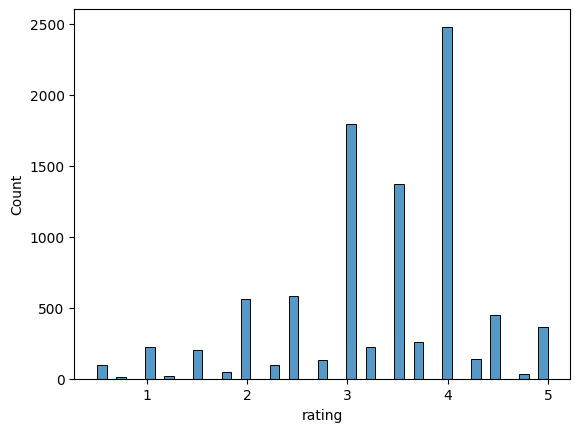

In [58]:
sns.histplot(data = rating_movies,
             x = "rating")

In [59]:
rating_movies["good_movies"] = rating_movies["rating"] >=3

<Axes: ylabel='good_movies'>

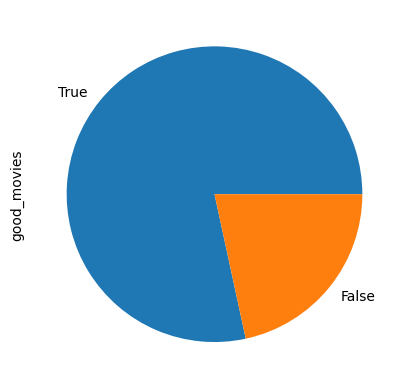

In [60]:
rating_movies["good_movies"].value_counts().plot(kind = "pie")

In [61]:
new_df = movies_data.merge(rating_movies,
                        left_on = "id",
                        right_on = "movieId",
                        how = "inner")

Kesimpulan : film - film dengan rating >= 3 lebih banyak daripada film - film dengan rating dibawahnya

<Axes: >

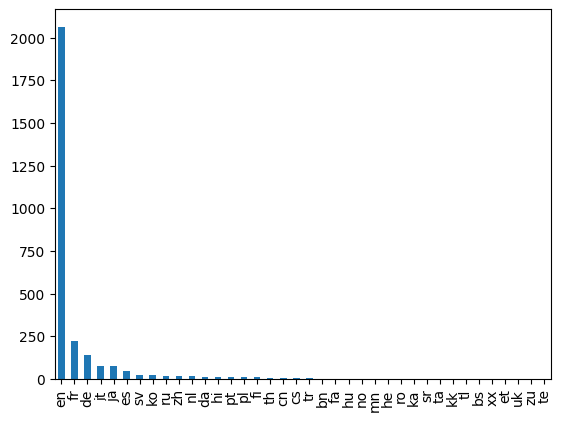

In [62]:
new_df["original_language"].value_counts().plot(kind = "bar")

 **2. Bagaimana distribusi dari durasi film yang ada ?**

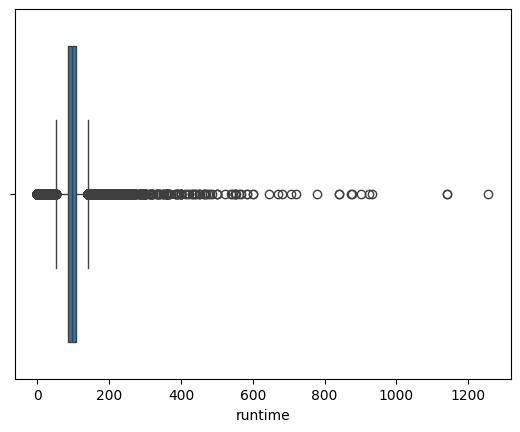

In [63]:
sns.boxplot(data = movies_data, x = "runtime")
plt.show()

Kesimpulan : banyak film yang memiliki durasi dalam >= 200 & <= 600

**3. Apakah ada hubungan antara durasi film dengan rating yang didapatkan**

In [64]:
duration_rating = movies_data.merge(rating_movies,
                                    left_on = "id",
                                    right_on = "movieId",
                                    how = "outer")

In [65]:
duration_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51699 entries, 0 to 51698
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  object        
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  float64       
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  float64       
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

<Axes: xlabel='runtime', ylabel='rating'>

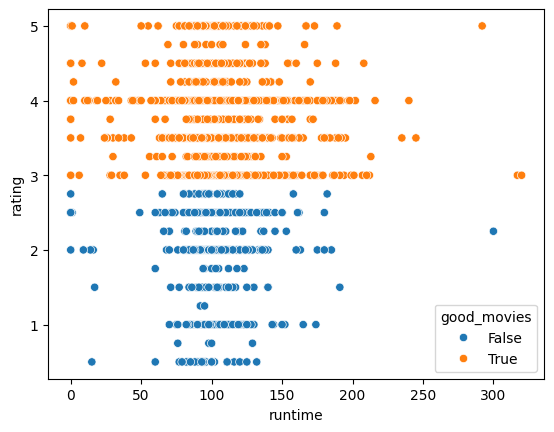

In [66]:
sns.scatterplot(data = duration_rating,
                x = "runtime",
                y = "rating",
                hue = "good_movies")

Kesimpulan : Tidak ada hubungan

**4. Bagaimana distribusi dari keuntungan ( Profit ) yang dihasilkan oleh suatu film ?**

In [67]:
movies_data["profit"] = movies_data["revenue"] - movies_data["budget"]

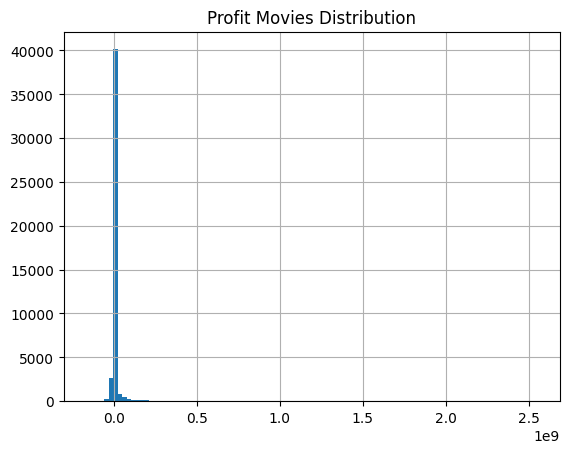

In [68]:
movies_data["profit"].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [69]:
movies_data["profit"].describe()

count    4.546000e+04
mean     6.984491e+06
std      5.214125e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

<Axes: >

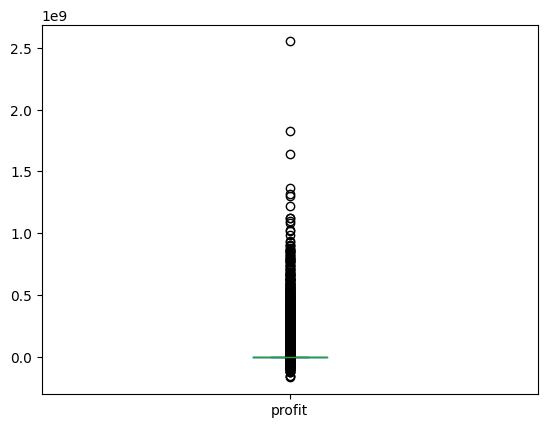

In [70]:
movies_data["profit"].plot(kind = "box")

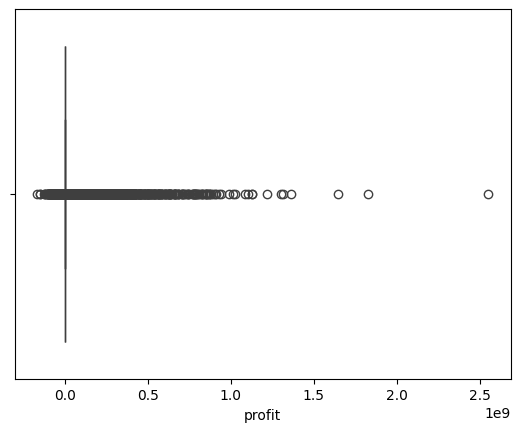

In [71]:
sns.boxplot(data = movies_data, x = "profit")
plt.show()

In [72]:
movies_data["profit"].quantile(0.88)

43391.87999999827

Kesimpulan : Hanya ada 12% film yang mampu memberikan profit, sisanya hanya hanya balik modal

**5. Apakah ada hubungan antara profit & rating**

In [73]:
profitable_movies = movies_data[movies_data["profit"] >0]

In [74]:
profit_rating = profitable_movies.merge(rating_movies,
                                        left_on = "id",
                                        right_on = "movieId",
                                        how = "inner")

In [75]:
profit_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1031
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  1032 non-null   bool          
 1   belongs_to_collection  326 non-null    object        
 2   budget                 1032 non-null   int64         
 3   genres                 1032 non-null   object        
 4   homepage               334 non-null    object        
 5   id                     1032 non-null   int64         
 6   imdb_id                1032 non-null   object        
 7   original_language      1032 non-null   object        
 8   original_title         1032 non-null   object        
 9   overview               1032 non-null   object        
 10  popularity             1032 non-null   float64       
 11  poster_path            1032 non-null   object        
 12  production_companies   1032 non-null   object        
 13  pro

<Axes: xlabel='rating', ylabel='profit'>

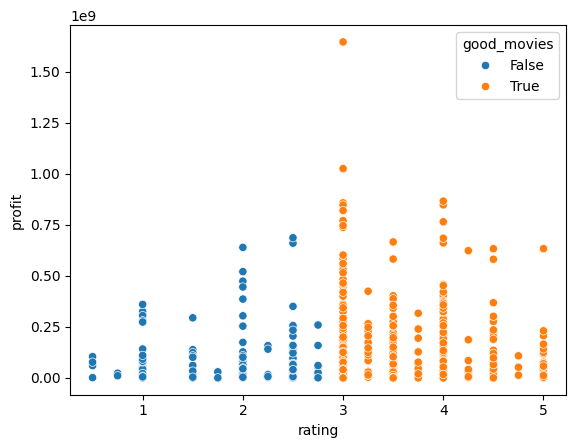

In [76]:
sns.scatterplot(data = profit_rating,
                x = "rating",
                y = "profit",
                hue = "good_movies")

Kesimpulan : Tidak hubungan antara profit & rating

## **E. Machine Learning Workflow**

In [77]:
new_df = profit_rating

In [78]:
new_df.select_dtypes(include = "number")

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,movieId,rating
0,60000000,949,17.924927,187436818.0,170.0,7.7,1886.0,127436818.0,949,3.75
1,58000000,710,14.686036,352194034.0,130.0,6.6,1194.0,294194034.0,710,1.50
2,52000000,524,10.137389,116112375.0,178.0,7.8,1343.0,64112375.0,524,3.50
3,16500000,4584,10.673167,135000000.0,136.0,7.2,364.0,118500000.0,4584,5.00
4,4000000,5,9.026586,4300000.0,98.0,6.5,539.0,300000.0,5,3.00
...,...,...,...,...,...,...,...,...,...,...
1027,0,106417,1.133760,15.0,133.0,4.8,4.0,15.0,106417,3.00
1028,0,79163,0.003568,2203.0,81.0,0.0,0.0,2203.0,79163,4.00
1029,0,2104,1.286005,60700.0,98.0,5.0,2.0,60700.0,2104,4.00
1030,5300000,8453,3.003526,22175908.0,168.0,6.7,53.0,16875908.0,8453,4.00


In [79]:
def select_columns(df: pd.DataFrame, features: list, target: list = "rating") :

  df = df.dropna().reset_index(drop = True)
  X = df[features]
  y = (df[target] >= 3).astype("int")

  return X, y

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
features = ["budget", "popularity", "vote_average"]
X, y = select_columns(new_df, features = features)

In [82]:
X

,budget,popularity,vote_average
0,58000000,14.686036,6.6
1,19000000,15.339153,6.9
2,27000,10.513367,7.4
3,11000000,42.149697,8.1
4,63000000,8.863776,7.6
...,...,...,...
120,380000000,27.887720,6.4
121,35000000,9.856955,6.4
122,200000000,13.693002,5.8
123,140000000,19.323582,6.6


In [83]:
y

0      0
1      0
2      1
3      1
4      1
      ..
120    1
121    1
122    0
123    1
124    0
Name: rating, Length: 125, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [85]:
X_train

,budget,popularity,vote_average
85,50000000,7.938457,6.3
30,63000000,33.366332,7.9
94,110000000,11.902354,5.2
55,70000000,12.722381,5.8
9,6000000,14.044122,7.1
...,...,...,...
106,60000000,11.805233,5.5
14,32350000,14.586087,7.9
92,19000000,11.649588,7.2
51,68000000,9.268136,5.9


In [86]:
38/(38 + 87)

0.304

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
minmax = MinMaxScaler()

In [89]:
minmax.fit(X_train)

MinMaxScaler()

In [90]:
def scaling(df, scaler):

  # df["runtime	"] = df["runtime"].div(60)

  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns = scaler.get_feature_names_out())

  return scaled_df

In [91]:
scaling(X_train, minmax)

,budget,popularity,vote_average
0,0.131579,0.039020,0.500000
1,0.165789,0.315648,0.863636
2,0.289474,0.082143,0.250000
3,0.184211,0.091064,0.386364
4,0.015789,0.105443,0.681818
...,...,...,...
82,0.157895,0.081086,0.318182
83,0.085132,0.111339,0.863636
84,0.050000,0.079393,0.704545
85,0.178947,0.053485,0.409091


In [92]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [93]:
X_test

,budget,popularity,vote_average
18,2280000,8.037960,7.2
42,40000000,12.189038,6.2
36,125000000,18.971780,5.9
76,113000000,13.165421,7.1
53,140000000,16.775716,6.1
91,24000000,11.697604,6.5
56,79000000,29.423537,8.0
123,140000000,19.323582,6.6
93,50000000,2.159558,6.0
4,63000000,8.863776,7.6


# **F. Supervised Machine Learning**

In [94]:
X_test_scaled.iloc[0]

budget          0.006000
popularity      0.040102
vote_average    0.704545
Name: 0, dtype: float64

In [95]:
X_test_scaled

,budget,popularity,vote_average
0,0.006000,0.040102,0.704545
1,0.105263,0.085261,0.477273
2,0.328947,0.159051,0.409091
3,0.297368,0.095883,0.681818
4,0.368421,0.135160,0.454545
5,0.063158,0.079915,0.545455
6,0.207895,0.272755,0.886364
7,0.368421,0.162878,0.568182
8,0.131579,-0.023849,0.431818
9,0.165789,0.049086,0.795455


In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [98]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [99]:
y_train_pred_knn = knn.predict(X_train_scaled)

In [100]:
y_test_pred_knn = knn.predict(X_test_scaled)

In [101]:
pd.crosstab(y_test, y_test_pred_knn)

col_0,0,1
rating,,
0,1,5
1,1,31


**Decision Tree**

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt = DecisionTreeClassifier()

In [104]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [105]:
y_train_pred_dt = dt.predict(X_train_scaled)

In [106]:
y_test_pred_dt = dt.predict(X_test_scaled)

In [107]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
rating,,
0,2,4
1,6,26


**Model Evaluation**

In [108]:
from sklearn.metrics import confusion_matrix, classification_report

In [109]:
confusion_matrix(y_test, y_test_pred_dt)

array([[ 2,  4],
       [ 6, 26]])

In [110]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.87      0.81      0.84        32

    accuracy                           0.74        38
   macro avg       0.56      0.57      0.56        38
weighted avg       0.77      0.74      0.75        38



In [114]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.86      0.97      0.91        32

    accuracy                           0.84        38
   macro avg       0.68      0.57      0.58        38
weighted avg       0.80      0.84      0.81        38



In [112]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [116]:
print("recall: ", recall_score(y_test, y_test_pred_knn))
print("precision: ", precision_score(y_test, y_test_pred_knn))
print("accuracy: ", accuracy_score(y_test, y_test_pred_knn))
print("f1 score: ", f1_score(y_test, y_test_pred_knn))

recall:  0.96875
precision:  0.8611111111111112
accuracy:  0.8421052631578947
f1 score:  0.911764705882353


# **G. Tuning**

In [117]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [119]:
knn_params = KNeighborsClassifier(n_neighbors= 7, p= 3,)

In [120]:
 knn_params.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=3)

In [124]:
print(classification_report(y_test, knn_params.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      1.00      0.91        32

    accuracy                           0.84        38
   macro avg       0.42      0.50      0.46        38
weighted avg       0.71      0.84      0.77        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
print(confusion_matrix(y_test, knn_params.predict(X_test)))

[[ 0  6]
 [ 0 32]]


In [126]:
knn_params = {
    "n_neighbors" : [3, 5, 7, 9],
    "p" : [1, 2, 3, 4, 5,]
}

**Gridsearch**

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
knn_new = GridSearchCV(KNeighborsClassifier(),
                       knn_params,
                       scoring = f1_score)

In [129]:
knn_new.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: f1_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: f1_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3, 4, 5]},
             scoring=<function f1_score at 0x7b2c0255eb90>)

In [130]:
knn_best = knn_new.best_estimator_

In [131]:
knn_new.best_score_

nan

In [135]:
prob = knn_best.predict_proba(X_test)[:, 1]

In [136]:
(prob >= 0.5).astype("int")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [137]:
knn_best.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [139]:
recall_ = []
precision_ = []
accuracy_ = []
f1_score_ = []
for i in range(1, 11):
    y_best_knn_proba = knn_best.predict_proba(X_test)[:, 1]
    recall_.append(recall_score(y_test, y_best_knn_proba >= i/10))
    precision_.append(precision_score(y_test, y_best_knn_proba >= i/10))
    accuracy_.append(accuracy_score(y_test, y_best_knn_proba >= i/10))
    f1_score_.append(f1_score(y_test, y_best_knn_proba >= i/10))

In [141]:
metrics = pd.DataFrame({"recall": recall_,
                        "precision" : precision_,
                        "accuracy" : accuracy_,
                        "f1_score" : f1_score_})

In [142]:
metrics["fpr"] = 1 - metrics["recall"]

<Axes: xlabel='fpr'>

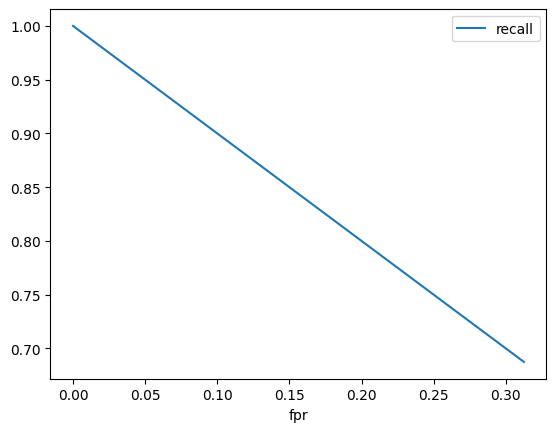

In [144]:
metrics.plot(x = "fpr",
             y = "recall")

In [146]:
from sklearn.metrics import roc_auc_score

In [147]:
roc_auc_score(y_test, knn_best.predict(X_test))

0.5677083333333334